# Analizando datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [55]:
df = pd.read_csv('datos_produccion_clima_35.csv', sep=",")

In [56]:
df

,fecha,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento
0,31/12/1985,3514,1419,912,15600,0.00,0.00,4.44,64.27,14.3,6.4,20.9,0.0,208.6,0.0,6.1
1,31/12/1986,3783,1520,680,18167,0.00,0.00,4.80,44.74,12.9,5.8,20.5,58.1,130.3,0.0,6.8
2,31/12/1987,3988,1928,512,11200,0.00,0.00,2.81,26.56,13.8,6.8,20.7,60.3,199.5,0.0,6.4
3,31/12/1988,3590,1560,310,13197,0.00,0.00,3.68,19.87,12.9,5.5,20.4,54.9,85.5,0.0,6.3
4,31/12/1989,2830,1210,150,12300,0.00,0.00,4.35,12.40,14.5,7.1,21.9,56.5,92.5,0.0,6.3
5,31/12/1990,2396,998,124,13900,0.00,0.00,5.80,12.42,14.2,6.8,21.7,56.2,96.0,0.0,7.4
6,31/12/1991,2503,1122,60,15800,0.00,0.00,6.31,5.35,13.2,5.8,20.6,60.3,240.0,0.0,6.3
7,31/12/1992,2790,1125,70,11600,0.00,0.00,4.16,6.22,14.4,4.7,19.9,62.2,335.2,0.0,6.4
8,31/12/1993,2765,1240,65,10306,0.00,0.00,3.73,5.24,14.8,5.5,21.0,58.1,155.7,0.0,5.9
9,31/12/1994,2641,925,34,9000,0.00,0.00,3.41,3.68,13.5,4.6,24.3,53.7,82.5,0.0,15.5


In [52]:
df['rinde_seco'] = pd.to_numeric(df['rinde_seco'], errors='coerce')
df['finura'] = pd.to_numeric(df['finura'], errors='coerce')
df['kilo_lana_p/animal'] = pd.to_numeric(df['kilo_lana_p/animal'], errors='coerce')
df['porcentaje_paricion'] = pd.to_numeric(df['porcentaje_paricion'], errors='coerce')
df['temp_media'] = pd.to_numeric(df['temp_media'], errors='coerce')
df['temp_min'] = pd.to_numeric(df['temp_min'], errors='coerce')
df['tem_max'] = pd.to_numeric(df['tem_max'], errors='coerce')
df['humedad'] = pd.to_numeric(df['humedad'], errors='coerce')
df['cant_lluvia'] = pd.to_numeric(df['cant_lluvia'], errors='coerce')
df['rad_solar'] = pd.to_numeric(df['rad_solar'], errors='coerce')
df['vel_viento'] = pd.to_numeric(df['vel_viento'], errors='coerce')

In [57]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (36, 16)
Nombre columnas: Index(['fecha', 'esquila', 'ovejas', 'corderos', 'kilos_lana', 'rinde_seco',
       'finura', 'kilo_lana_p/animal', 'porcentaje_paricion', 'temp_media',
       'temp_min', 'tem_max', 'humedad', 'cant_lluvia', 'rad_solar',
       'vel_viento'],
      dtype='object')


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha                36 non-null     object 
 1   esquila              36 non-null     int64  
 2   ovejas               36 non-null     int64  
 3   corderos             36 non-null     int64  
 4   kilos_lana           36 non-null     int64  
 5   rinde_seco           36 non-null     float64
 6   finura               36 non-null     float64
 7   kilo_lana_p/animal   36 non-null     float64
 8   porcentaje_paricion  36 non-null     float64
 9   temp_media           36 non-null     float64
 10  temp_min             36 non-null     float64
 11  tem_max              36 non-null     float64
 12  humedad              36 non-null     float64
 13  cant_lluvia          36 non-null     float64
 14  rad_solar            36 non-null     float64
 15  vel_viento           36 non-null     float

In [59]:
df.describe()

,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2910.166667,1497.805556,522.527778,11813.388889,30.692222,10.400833,4.143889,34.732778,13.452778,5.805556,21.150000,51.222222,181.741667,2184.044444,7.372222
std,709.540395,561.386387,359.433641,2933.659258,29.533112,9.990382,0.867885,20.408218,0.680960,0.948365,1.009809,12.709729,71.551250,2223.645303,2.493146
min,1651.000000,768.000000,34.000000,5245.000000,0.000000,0.000000,2.810000,3.680000,11.900000,2.600000,19.300000,0.000000,59.800000,0.000000,4.100000
25%,2352.250000,1116.750000,275.000000,9921.250000,0.000000,0.000000,3.597500,18.007500,12.975000,5.500000,20.600000,50.575000,130.600000,0.000000,6.050000
50%,2896.500000,1309.000000,503.500000,11410.500000,53.500000,18.500000,3.970000,37.365000,13.500000,6.000000,20.950000,55.000000,181.900000,2046.800000,6.600000
75%,3503.500000,1852.500000,714.000000,13566.500000,57.925000,19.600000,4.540000,48.230000,13.825000,6.400000,21.625000,56.750000,213.875000,4253.225000,7.975000
max,4239.000000,3083.000000,1455.000000,18167.000000,65.270000,21.000000,6.310000,71.600000,14.800000,7.100000,24.300000,62.200000,355.000000,5019.000000,15.500000


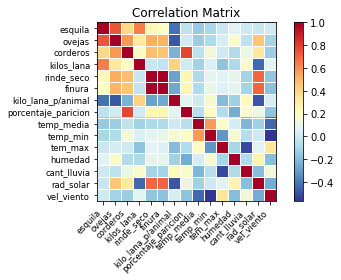

In [60]:
corr = df.set_index('fecha').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

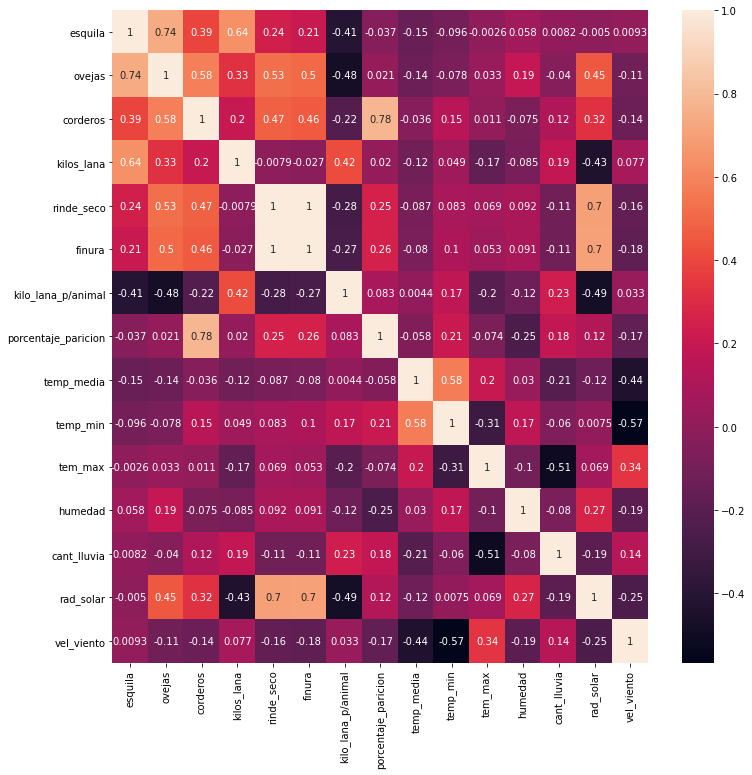

In [65]:
correlation_mat = df.corr()
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlation_mat, annot = True, ax = ax)

In [62]:
df.corr()

,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento
esquila,1.000000,0.740884,0.391505,0.641326,0.243610,0.209908,-0.407642,-0.037202,-0.145936,-0.095927,-0.002552,0.058091,0.008152,-0.005042,0.009299
ovejas,0.740884,1.000000,0.582920,0.325377,0.528266,0.504378,-0.477438,0.020741,-0.137657,-0.078467,0.033125,0.190747,-0.039575,0.450021,-0.109077
corderos,0.391505,0.582920,1.000000,0.200136,0.473912,0.458518,-0.223997,0.782419,-0.035767,0.145390,0.010836,-0.074989,0.117875,0.322784,-0.135520
kilos_lana,0.641326,0.325377,0.200136,1.000000,-0.007938,-0.027184,0.416885,0.019703,-0.115961,0.049104,-0.171192,-0.085336,0.185744,-0.434207,0.077018
rinde_seco,0.243610,0.528266,0.473912,-0.007938,1.000000,0.997536,-0.284601,0.254502,-0.087072,0.083446,0.069196,0.091804,-0.108371,0.696648,-0.162964
finura,0.209908,0.504378,0.458518,-0.027184,0.997536,1.000000,-0.265111,0.256903,-0.079765,0.103398,0.053019,0.090692,-0.108769,0.702193,-0.178112
kilo_lana_p/animal,-0.407642,-0.477438,-0.223997,0.416885,-0.284601,-0.265111,1.000000,0.082682,0.004429,0.173192,-0.204180,-0.120281,0.234535,-0.485526,0.032825
porcentaje_paricion,-0.037202,0.020741,0.782419,0.019703,0.254502,0.256903,0.082682,1.000000,-0.058117,0.207714,-0.073802,-0.249633,0.184808,0.120514,-0.170033
temp_media,-0.145936,-0.137657,-0.035767,-0.115961,-0.087072,-0.079765,0.004429,-0.058117,1.000000,0.575121,0.200063,0.030166,-0.214100,-0.123780,-0.436502
temp_min,-0.095927,-0.078467,0.145390,0.049104,0.083446,0.103398,0.173192,0.207714,0.575121,1.000000,-0.312366,0.168951,-0.060467,0.007479,-0.566428
